In [3]:
"""
№ 8.3.1

y"=y^2+1
(y[n+1]-2y[n]+y[n-1])/h^2=y[n]^2+1
y[0]=2
y[-1]=6.25

(y[1]-y[0])/h=a

"""

'\n№ 8.3.1\n\ny"=y^2+1\n(y[n+1]-2y[n]+y[n-1])/h^2=y[n]^2+1\ny[0]=2\ny[-1]=6.25\n\n(y[1]-y[0])/h=a\n\n'

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
h = 0.0001
N = 10000
y_0 = 2.
y_1 = 6.25

In [6]:
def solve(p):
    Y = np.zeros(N, dtype = float)
    Y[0] = y_0
    Y[1] = p * h + Y[0]
    for n in range(2, N):
        Y[n] = 2 * Y[n - 1] - Y[n - 2] + h**2 * (Y[n - 1]**2 + 1)
    return Y

In [7]:
def solve_with_different_params(P):
    Y_best = solve(P[0])
    p_best = P[0]
    y_best = Y_best[-1]
    for p in P[1:]:
        Y = solve(p)
        if np.abs(Y[-1] - y_1) < np.abs(y_best - y_1):
            y_best = Y[-1]
            p_best = p
            Y_best = Y
    return Y_best, p_best

p_best = 0.19597989949748745 	 Y[-1] = 6.247536726526142


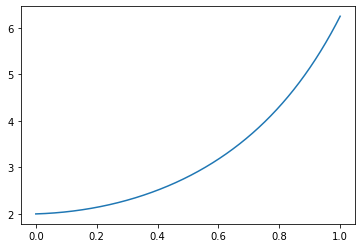

In [8]:
P = np.linspace(0, 1, 200)
Y, p = solve_with_different_params(P)
X = np.linspace(0, 1, N, dtype = float)
plt.plot(X, Y)
print("p_best =", p, "\t", "Y[-1] =", Y[-1])

In [20]:
def interp(X, Y, XQ):
    def line(xl, xr, yl, yr, x):
        return (yr * (x - xl) + yl * (xr - x)) / (xr - xl)
    YQ = np.zeros_like(XQ)
    YQ = np.zeros_like(XQ)
    for j in range(XQ.size):
        if XQ[j] <= X[0]:
            YQ[j] = line(X[0], X[1], Y[0], Y[1], XQ[j])
        elif XQ[j] > X[-1]:
            YQ[j] = line(X[-2], X[-1], Y[-2], Y[-1], XQ[j])
        else:
            for i in range(0, X.size - 1):
                if X[i] < XQ[j] <= X[i + 1]:
                    YQ[j] = line(X[i], X[i + 1], Y[i], Y[i + 1], XQ[j])
                    break
    return YQ

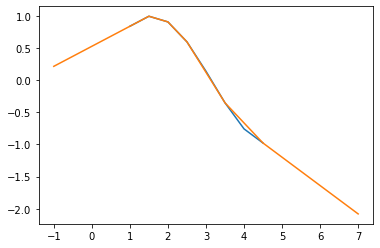

In [23]:
X = np.arange(1, 5, 0.5)
Y = np.sin(X)
XQ = np.array([-1, 0, 1.5, 2, 2.5, 3.5, 4.5, 6, 7])
YQ = interp(X, Y, XQ)
plt.plot(X, Y)
plt.plot(XQ, YQ)

In [ ]:
import sys

with open('somefilename.txt', 'w') as fid:
        sys.stdout = fid
        print('#s    \n','Layout')
        print('#s    \n','  HT    Fin')
        print('#10.0f   #10.0f \n',123,3456)
        print('#s    \n','Wing Section')
        #
        # Wing
        #
        # thickw=[0.15 0.12 0.11 0.10 0.10 0.10 0.10]
        # epsw=[3. 2. 1. 0. -1. -1.5 -2.]
        #
        #
        print('#s   #10.5f \n','ARW=     ',23.45)
        sys.stdout = original_stdout